In [1]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
import pymagnet as pm
import numpy as np

First define convenience functions, alpha, beta, gamma are the rotation angles with respect to z,y x axes

In [2]:
def gen_magnets(alpha, beta, gamma, **kwargs):
    pm.reset_magnets()

    width = 10
    depth = 50
    height = 10
    hGap = kwargs.pop('hGap', 1)
    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    

    # magnetised in x: 
    theta, phi = 0.0, 90.0
 
    center = (-width/2 - 5*hGap, 0, 0)


    m1 = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    
    
    center = (10,-5, 0)
    sphere1 = pm.magnets.Sphere(radius = width, Jr = 1.0, center=center,
                              theta = 0, phi = 0,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    
    center = (20,15, 0)
    R = 5
    L = 20

    m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.0,
                                center=center,
                                theta = 0, phi = 0,
                                alpha = alpha,
                                beta = beta,
                                gamma = gamma,
                                mask_magnet=mask_magnet)


In [3]:
def gen_sphere(alpha, beta, gamma, **kwargs):
    pm.reset_magnets()

    radius = 10
    center = (0,0, 0)
    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    
    sphere1 = pm.magnets.Sphere(radius = radius, Jr = 1.0, center=center,
                              theta = 0, phi = 0,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)


In [4]:
def gen_cylinder(alpha, beta, gamma, **kwargs):
    pm.reset_magnets()

    center = (0, 0, 0)    
    radius = 5   
    L = 20
    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    
    m_cyl = pm.magnets.Cylinder(radius = radius, length = L, Jr = 1.0,
                                center=center,
                                theta = 0, phi = 0,
                                alpha = alpha,
                                beta = beta,
                                gamma = gamma,
                                mask_magnet=mask_magnet)
 


In [5]:
def gen_quad(alpha, beta, gamma, **kwargs):
    pm.reset_magnets()

    width = 10
    depth = 50
    height = 10
    hGap = kwargs.pop('hGap', 5)
    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    

    # magnetised in x: 
    theta, phi = 0.0, 90.0
    
    
    
 
    center = (-width/2 - hGap, 0, height/2)

    m1 = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    
    
    center = (width/2 + hGap, 0,  height/2)
    m2 = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    

    

    
    center = (-width/2 - hGap, 0, -height/2)
    m3 = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = -1.0, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    
    center = (width/2 + hGap, 0,  -height/2)
    m4 = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = -1.0, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)



In [6]:
def gen_prism(alpha, beta, gamma, **kwargs):
    pm.reset_magnets()

    width = 10
    depth = 20
    height = 30
    center = (0, 0, 0)
    
    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    

    # magnetised in z: 
    theta, phi = 90.0, 0.0

    m1 = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = 1.0, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)




In [7]:
def gen_pseudo_halbach(alpha, beta, gamma, **kwargs):
    pm.reset_magnets()

    width = 30
    depth = width*2
    height = width
    wall = 0
    theta, phi = 0.0, 0.0
    Jr = 1.26

    
    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    
    center = (0, 0, height + wall)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = Jr, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    center = (width + wall, 0, 0)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = -Jr, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    center = (0, 0, -height - wall)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = Jr, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    center = (-width - wall, 0, 0)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = -Jr, center=center,
                              theta = theta, phi = phi,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    
    
    center = (height + wall, 0, height + wall)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = Jr, center=center,
                              theta = theta, phi = 90,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    center = (height + wall, 0, -height - wall)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = -Jr, center=center,
                              theta = theta, phi = 90,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    center = (-height - wall, 0, height + wall)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = -Jr, center=center,
                              theta = theta, phi = 90,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)
    
    center = (-height - wall, 0, -height - wall)
    _ = pm.magnets.Prism(width = width, depth = depth, height = height, Jr = Jr, center=center,
                              theta = theta, phi = 90,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=mask_magnet)




In [8]:
def gen_cylinder_array(alpha, beta, gamma, alternate = False, **kwargs):
    pm.reset_magnets()

    radius = 5    
    L = 20
    step = 3*radius
    Num_mag = kwargs.pop("Num_mag", 2)
    NnumJ = (Num_mag +1)*1j
    XX, YY, = np.mgrid[-Num_mag*step:Num_mag*step + step:step, -Num_mag*step:Num_mag*step + step:step]


    mask_magnet = kwargs.pop('mask_magnet', 'nan')

    for i, (xc, yc) in enumerate(zip(XX.ravel(), YY.ravel())):
        center = (xc, yc, -L/2 -0.5)    
        if alternate:
            odd_coef = np.real(1j**(2*i))
        else:
            odd_coef = 1
       
        
        _ = pm.magnets.Cylinder(radius = radius, length = L, Jr = 1.26*odd_coef,
                                    center=center,
                                    theta = 0, phi = 0,
                                    alpha = alpha,
                                    beta = beta,
                                    gamma = gamma,
                                    mask_magnet=mask_magnet)

    

In [16]:
mask_magnet = False # mask values inside a magnet
show_magnets = True # draw magnet in plots


# Uncomment one gen_XXX function to draw a magnet/magnet array:
# gen_magnets(alpha=20.0, beta=30.0, gamma=60.0, mask_magnet = mask_magnet)
# gen_quad(alpha=0.0, beta=0.0, gamma=0.0, mask_magnet = mask_magnet)
# gen_prism(alpha=10.0, beta=30.0, gamma=30.0, mask_magnet = mask_magnet)
# gen_sphere(alpha=30.0, beta=30.0, gamma=30.0, mask_magnet = mask_magnet)
# gen_cylinder(alpha=0.0, beta=45.0, gamma=4.0, mask_magnet = mask_magnet)
gen_cylinder_array(alpha=0.0, beta=0.0, gamma=0.0, alternate=True, mask_magnet = mask_magnet)
# gen_pseudo_halbach(alpha=0.0, beta=0.0, gamma=0.0, mask_magnet = mask_magnet)



fig_slice, slice_cache, data_objects = pm.plots.slice_quickplot(cmax=0.5,
                                              num_levels=6,
                                              opacity=1.0,
                                              num_arrows=10,
                                              num_points=200,
                                              cone_opacity=0.9,
                                              magnet_opacity=1.0,
                                              mask_magnet = mask_magnet,
                                              show_magnets=show_magnets,
                                              colorscale='viridis',
                                              max1 = 50,
                                              max2 = 50,
                                              slice_value= 0.0,
                                              unit = 'mm'
                               )

In [17]:
slice_cache.keys()

dict_keys(['xy', 'xz', 'yz'])

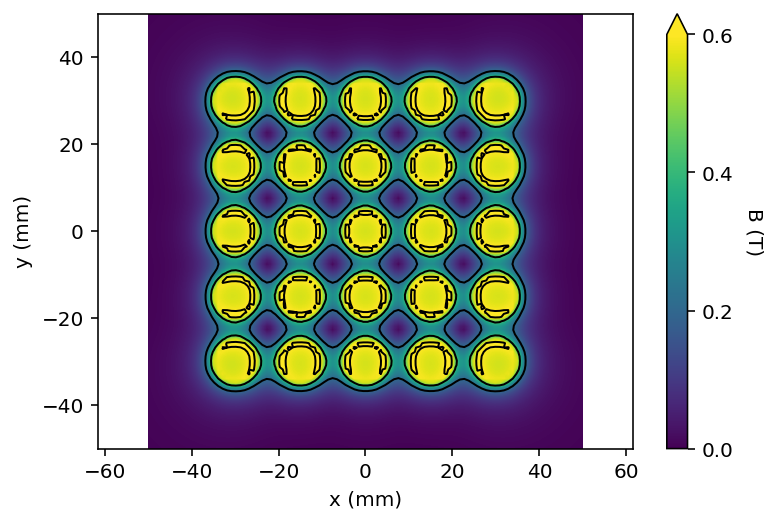

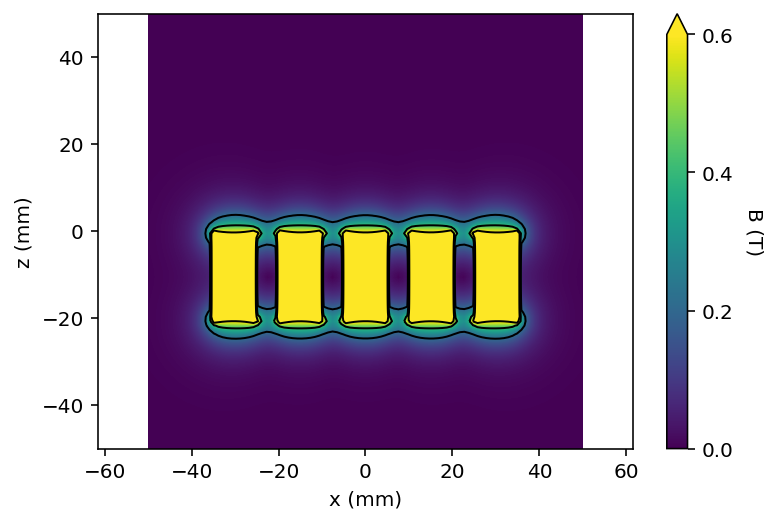

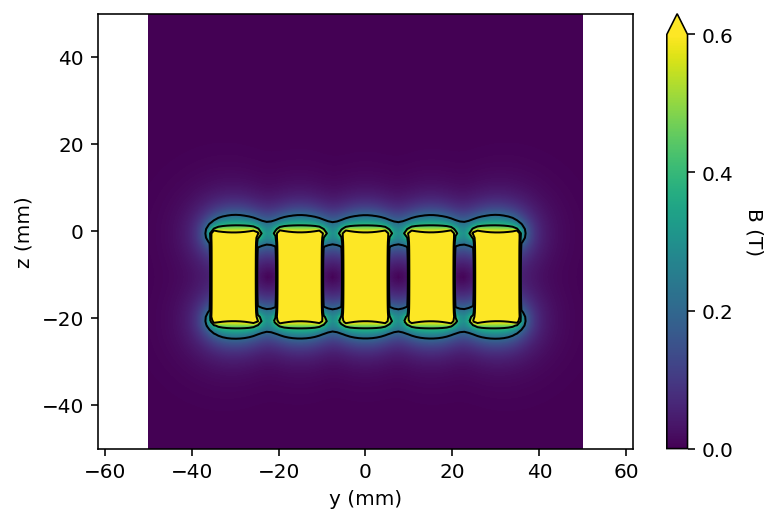

In [20]:
for plane in slice_cache.keys():
    pm.plots.plot_3D_contour(slice_cache[plane]['points'], slice_cache[plane]['field'], plane,
                             cmin = 0,
                             cmax=0.6,
                             num_levels=4,
                             cmap='viridis',
                             
#                              vector_plot=True,
#                              vector_arrows = 21,
#                              vector_color = 'k'
#                              plot_type="streamplot",
    #                          stream_color= 'vertical'
                            )


In [ ]:
fig_vol, vol_cache, data_objects = pm.plots.volume_quickplot(cmin=0.0,
                                    cmax=0.5,
                                    opacity=0.3,
                                    magnet_opacity=1.0,
                                    colorscale='viridis',
                                    no_caps=True,
                                    num_levels=6,
                                    num_points=50,
                                    show_magnets = True,
                                    xmax = 50,
                                    xmin = 0.0,
                                    ymax = 50,
                                    ymin = 0.0,
                                    zmax = 10,
                                    zmin = -10,
                                    unit = 'mm',
                                    opacityscale = 'normal',
#                                     isomin=0.05,
#                                     isomax=0.5,
                                   )
